# Tennis Ace
Codecademy Project

This project contains a series of open-ended requirements which describe the project you’ll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem.

You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load and investigate the data here:

In [2]:
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
print(tennis.columns)
print(tennis.shape)
print(tennis.info())

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')
(1721, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPoi

In [4]:
tennis.isnull().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

In [5]:
duplicate = tennis.duplicated(keep=False)
tennis[duplicate]

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
935,Facundo Bagnis,2015,0.59,0.64,0.30,0.52,0.45,20,0.43,43,...,0.16,0.35,63,0.68,0.47,0.59,2,4,123931,223
938,Facundo Bagnis,2015,0.59,0.64,0.30,0.52,0.45,20,0.43,43,...,0.16,0.35,63,0.68,0.47,0.59,2,4,123931,223
1315,Andrea Arnaboldi,2015,0.57,0.68,0.22,0.50,0.46,23,0.30,52,...,0.13,0.32,64,0.73,0.47,0.60,1,3,154062,222
1317,Andrea Arnaboldi,2015,0.57,0.68,0.22,0.50,0.46,23,0.30,52,...,0.13,0.32,64,0.73,0.47,0.60,1,3,154062,222


In [6]:
tennis.drop_duplicates(inplace=True, ignore_index=True)

<Figure size 216x216 with 0 Axes>

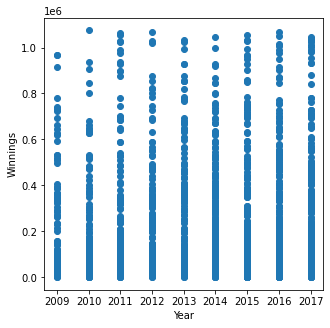

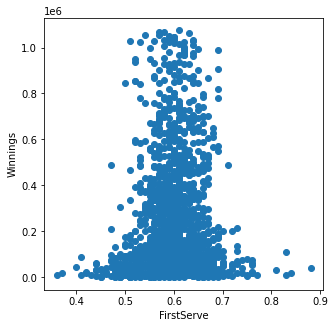

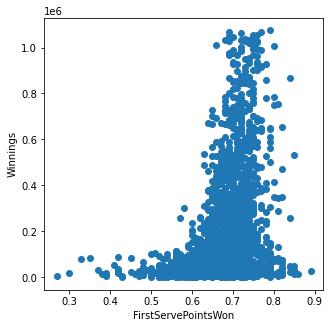

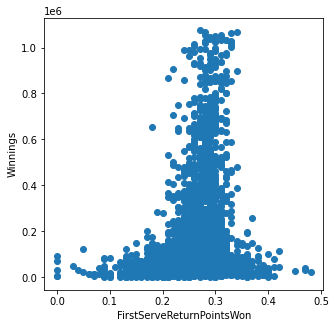

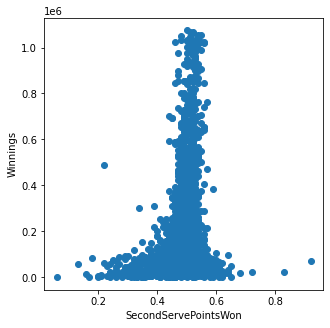

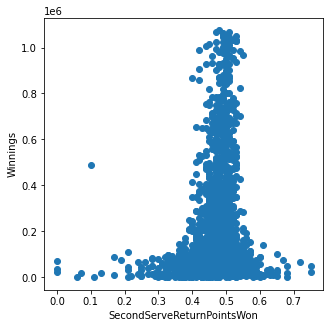

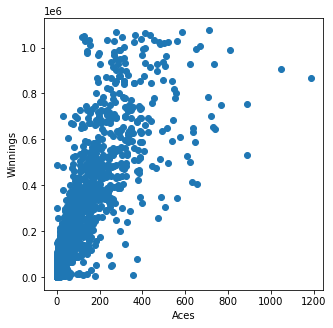

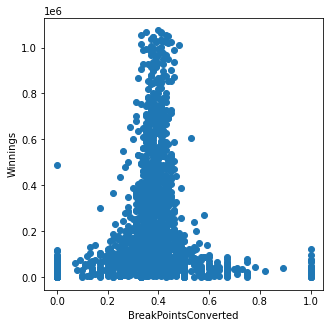

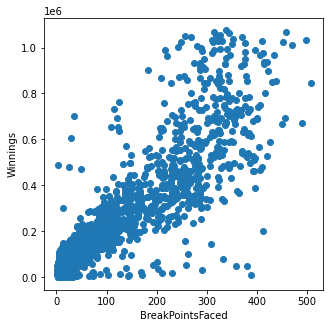

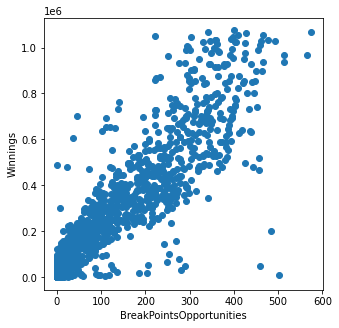

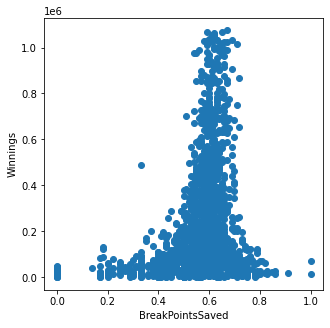

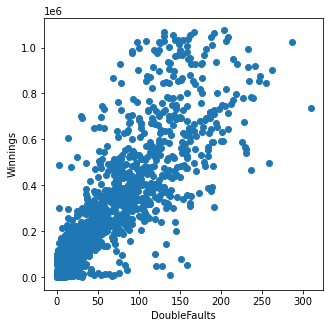

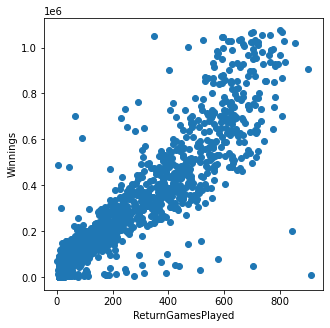

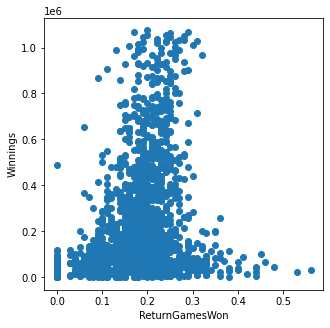

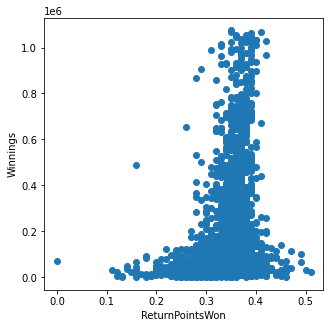

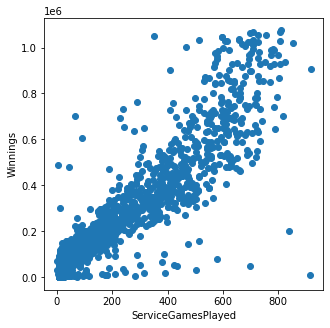

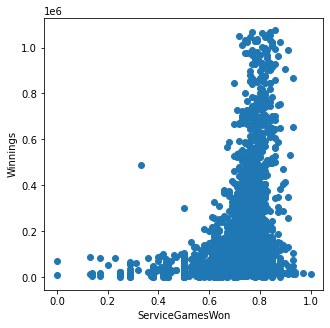

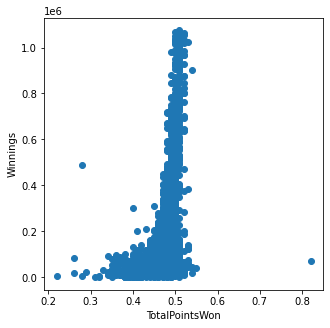

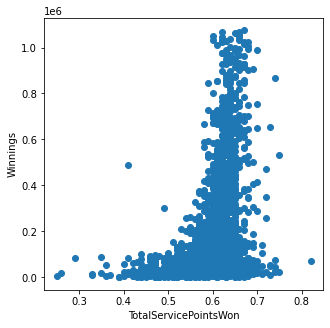

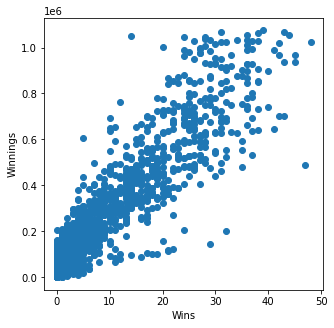

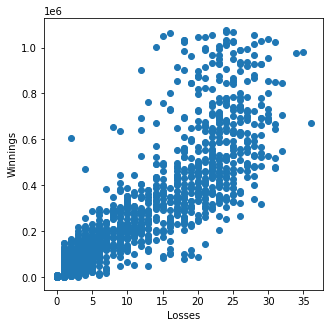

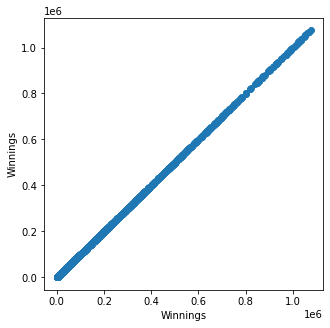

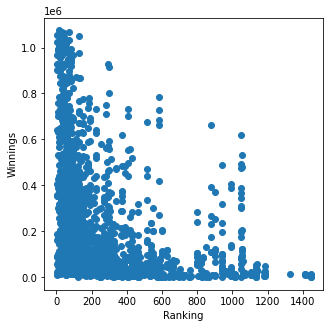

In [7]:
numCol = tennis.shape[1]
plt.figure(figsize=(3,3))

for i in range(1,numCol):
    plt.figure(figsize=(5,5))
    plt.scatter(tennis.iloc[:,i], tennis['Winnings'])
    plt.xlabel(tennis.columns[i])
    plt.ylabel('Winnings')
    plt.show()

BreakPointsOpportunities seems to have a strong relationship to Winnings. We will use this for our single linear regression.

0.7842896753388832


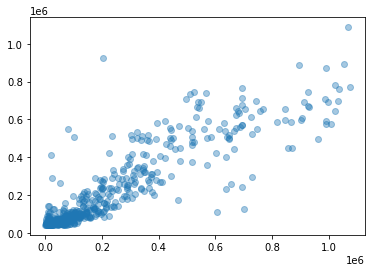

In [8]:
X = tennis[['BreakPointsOpportunities']]
y = tennis[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

linear = LinearRegression()
linear.fit(X_train, y_train)

print(linear.score(X_test, y_test))
predict = linear.predict(X_test)
plt.scatter(y_test, predict, alpha=0.4)

Let's now select multiple features to create a multiple linear regression model.

0.8144659785062411


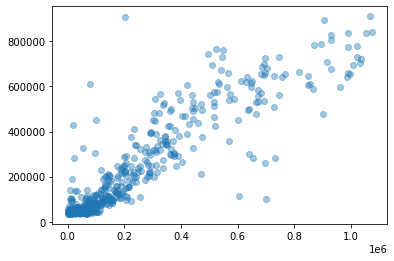

In [9]:
X = tennis[['BreakPointsOpportunities', 'ReturnGamesPlayed']]
y = tennis[['Winnings']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

linear = LinearRegression()
linear.fit(X_train, y_train)

print(linear.score(X_test, y_test))
predict = linear.predict(X_test)
plt.scatter(y_test, predict, alpha=0.4)